In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037 (1).csv")

#1. Load the dataset and display the first 10 rows.
print(data.head(10))

#2. Identify the number of rows and columns in the dataset.
print("number of rows : ",data.shape[0])
print("number of columns : ",data.shape[1])

#3. List all the columns and their data types.
print("columns: ")
print(data.dtypes)

#1. Calculate the mean, median, and standard deviation for the Score column.
mean = data['score'].mean()
median = data['score'].median()
std_dev = data['score'].std()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard deviation: {std_dev}")

# Identify the country with the highest and lowest happiness scores.
maximum = data[data['score']==data['score'].max()]
print(f"Country with maximum score is ",maximum['Country name'].values[0])

minimum = data[data['score']==data['score'].min()]
print(f"country with minimum score is ",minimum['Country name'].values[0])

#1. Check if there are any missing values in the dataset. If so, display the total count for each column.
missing = data.isnull().sum()
print(f"missing values total is: {missing}")

#Filter the dataset to show only the countries with a Score greater than 7.5.
greater_score = data[data['score']>7.5]
print("socre greater tha 7.5",greater_score)

#2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
#top 10 rows.
sorted_data = greater_score.sort_values(by='Log GDP per capita',ascending=False)
print("sorted data by GDP per capita \n",sorted_data.head(10))

#Create a new column called Happiness Category that categorizes countries into three categories
#based on their Score

def happiness_category(score):
  if score < 4:
    return 'low'
  elif 4 <= score <= 6:
    return 'Medium'
  else:
    return 'high'

data['Happiness Category'] = data['score'].apply(happiness_category)
print(data[['Country name','score','Happiness Category']])



  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

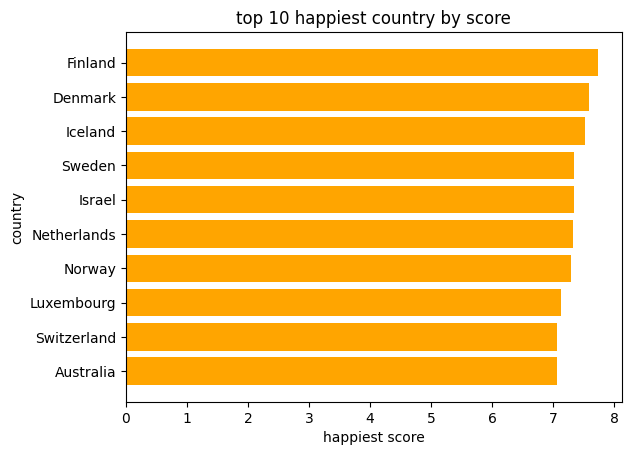

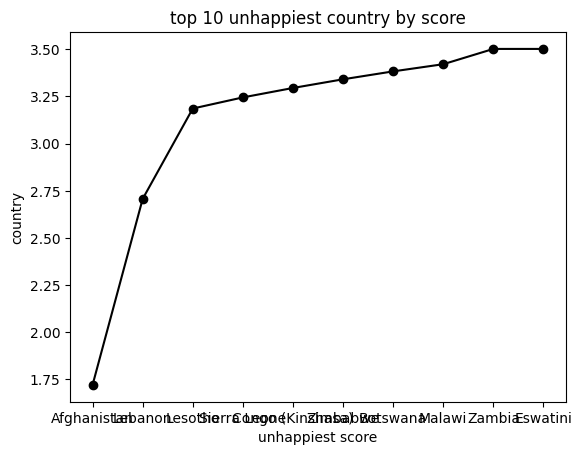

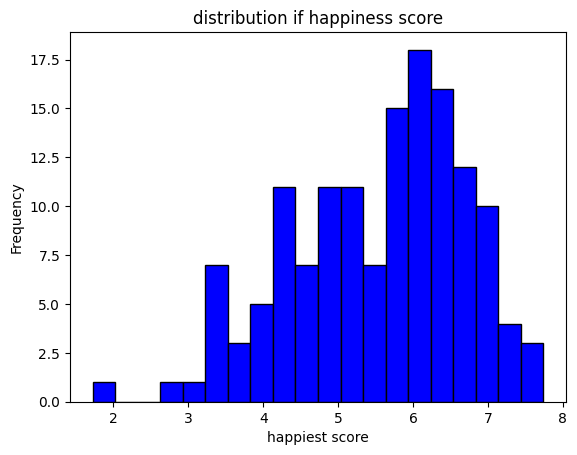

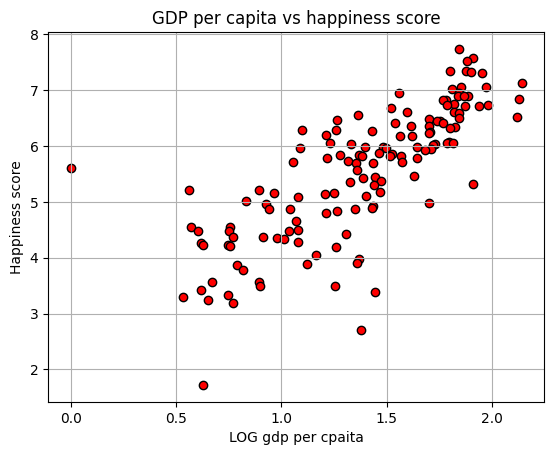

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037 (1).csv")


# #happpiest
happiest = data.nlargest(10,'score')
plt.barh(happiest['Country name'], happiest['score'], color='orange')
plt.title('top 10 happiest country by score')
plt.xlabel('happiest score')
plt.ylabel('country')
plt.gca().invert_yaxis()
plt.show()

#unhapppiest
unhappiest = data.nsmallest(10,'score')
plt.plot(unhappiest['Country name'], unhappiest['score'], marker ='o', color='black')
plt.title('top 10 unhappiest country by score')
plt.xlabel('unhappiest score')
plt.ylabel('country')
plt.show()

#score column
unhappiest = data.nsmallest(10,'score')
plt.hist(data['score'], bins=20, color='blue', edgecolor = 'black')
plt.title('distribution if happiness score')
plt.xlabel('happiest score')
plt.ylabel('Frequency')
plt.show()

#gdp per capita
plt.scatter(data['Log GDP per capita'],data['score'] ,color='red', edgecolor = 'black')
plt.title('GDP per capita vs happiness score')
plt.xlabel('LOG gdp per cpaita')
plt.ylabel('Happiness score')
plt.grid(True)
plt.show()

In [ ]:
# 1. Define the countries in South Asia with a list for example:
# south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

# "Maldives", "Nepal", "Pakistan", "Srilanka"]

# 2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
# 3. Save the filtered dataframe as separate CSV files for future use.


data = pd.read_csv("/content/drive/MyDrive/assignment 1/WHR-2024-5CS037.csv")
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

filtered = data[data['Country name'].isin(south_asian_countries)]
print(filtered)

filtered.to_csv("/content/drive/MyDrive/assignment 1/WHR-2024-5CS037.csv")


   Unnamed: 0.1  Unnamed: 0 Country name  score  Log GDP per capita  \
0             0          92        Nepal  5.158               0.965   
1             1         107     Pakistan  4.657               1.069   
2             2         125        India  4.054               1.166   
3             3         128   Bangladesh  3.886               1.122   
4             4         142  Afghanistan  1.721               0.628   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.990                    0.443                         0.653   
1           0.600                    0.321                         0.542   
2           0.653                    0.417                         0.767   
3           0.249                    0.513                         0.775   
4           0.000                    0.242                         0.000   

   Generosity  Perceptions of corruption  Dystopia + residual  
0       0.209                      0.115            

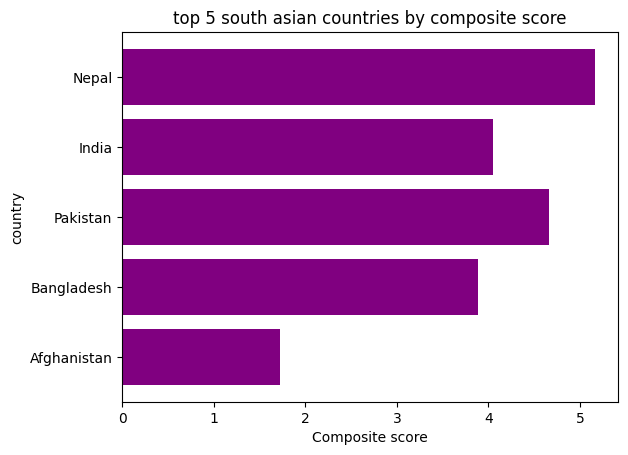

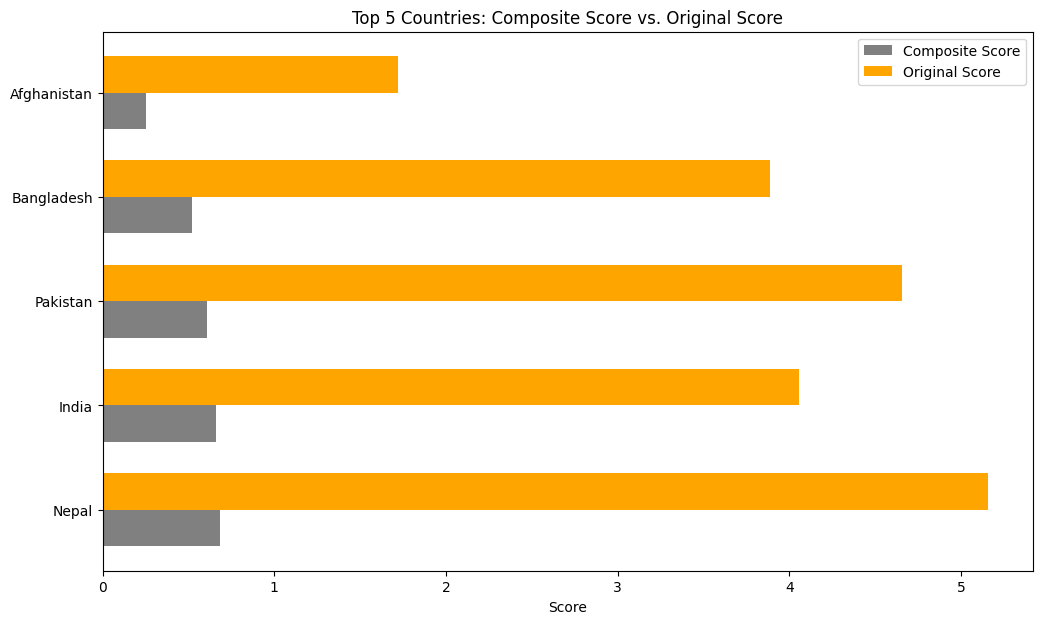

In [ ]:
# 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
# following metrics:

# Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

# + 0.30 × Healthy Life Expectancy
# 2. Rank the South Asian countries based on the Composite Score in descending order.
# 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
# 4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
# discussion with some visualization plot.
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/assignment 1/WHR-2024-5CS037.csv")
data['Composite Score'] = 0.40 * data['Log GDP per capita'] + 0.30 * data['Social support']
+ 0.30 * data['Healthy life expectancy']

ranked = data.sort_values(by='Composite Score', ascending = False)

top_5_composite = ranked.head(5)

plt.barh(top_5_composite['Country name'], top_5_composite['score'], color='purple')
plt.title('top 5 south asian countries by composite score')
plt.xlabel('Composite score')
plt.ylabel('country')
plt.gca().invert_yaxis()
plt.show()

top_5_original_score = ranked.head(5)

fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.35
index = range(5)

ax.barh(index, top_5_original_score['Composite Score'], bar_width, label='Composite Score', color='grey')
ax.barh([i + bar_width for i in index], top_5_original_score['score'], bar_width, label='Original Score', color='orange')
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(top_5_original_score['Country name'])
ax.set_xlabel('Score')
ax.set_title('Top 5 Countries: Composite Score vs. Original Score')
ax.legend()

plt.show()

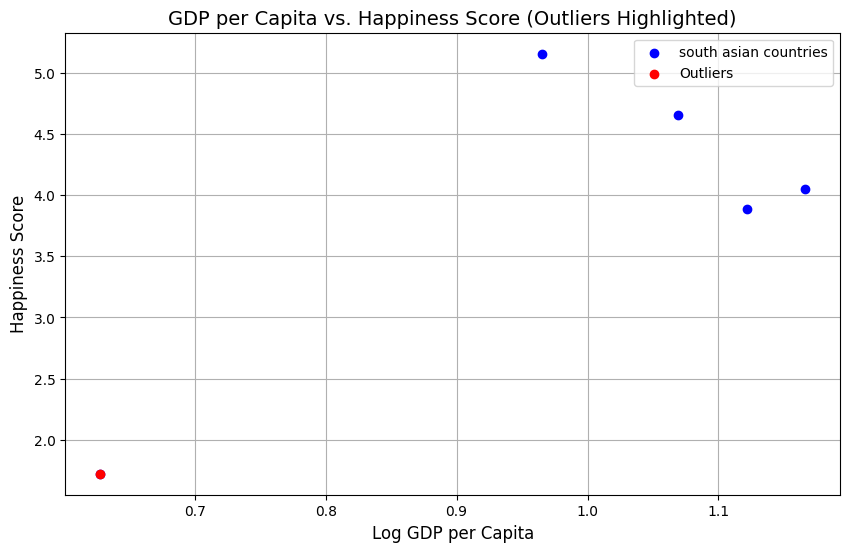

In [ ]:
# Task - 3 - Outlier Detection:
# Tasks:
# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
# 2. Define outliers using the 1.5 × IQR rule.
# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
# in a different color.
# 4. Discuss the characteristics of these outliers and their potential impact on regional averages.

data = pd.read_csv("/content/drive/MyDrive/assignment 1/WHR-2024-5CS037.csv")


def outlier_detection(data,column):
  Q1 = np.percentile(data[column],25)
  Q3 = np.percentile(data[column],75)
  IQR = Q3- Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5*IQR
  return data[(data[column]<lower_bound) | (data[column]>upper_bound)]

score_outlier = outlier_detection(data,'score')
GDP_outlier = outlier_detection(data,'Log GDP per capita')

combined_outliers = pd.concat([score_outlier, GDP_outlier]).drop_duplicates()
plt.figure(figsize=(10, 6))

plt.scatter(data['Log GDP per capita'], data['score'],label='south asian countries',
color='blue')
plt.scatter(
    combined_outliers['Log GDP per capita'],
    combined_outliers['score'],
    label='Outliers',
    color='red'
)
plt.title('GDP per Capita vs. Happiness Score (Outliers Highlighted)', fontsize=14)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()




correlation between Freedom to Make Life Choices and Score: 0.801497903141921
correlation between Generosity and Score: 0.8773326267276359


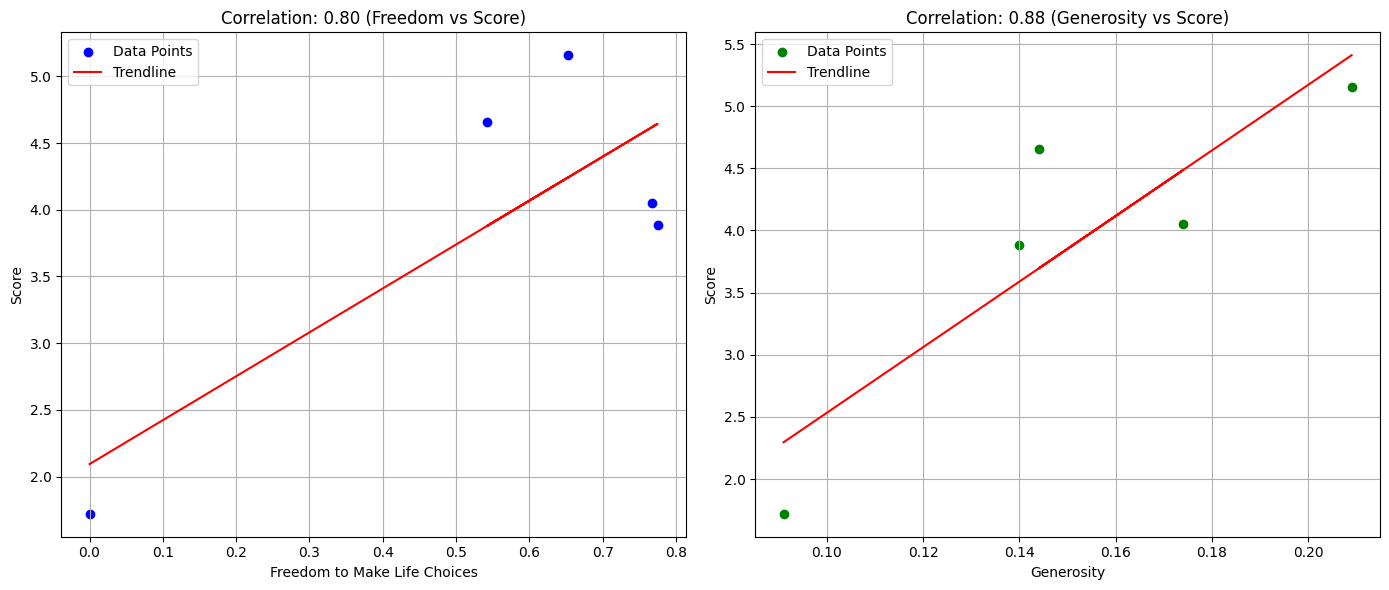

generosity is more correlated with score


In [ ]:
# Task - 4 - Exploring Trends Across Metrics:
# Tasks:
# 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
# {pearson correlation} with the Score for South Asian countries.
# 2. Create scatter plots with trendlines for these metrics against the Score.
# 3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
# South Asian countries.
data = pd.read_csv("/content/drive/MyDrive/assignment 1/WHR-2024-5CS037.csv")

correlation_freedom = data['Freedom to make life choices'].corr(data['score'])
correlation_generosity = data['Generosity'].corr(data['score'])

print(f"correlation between Freedom to Make Life Choices and Score: {correlation_freedom}")
print(f"correlation between Generosity and Score: {correlation_generosity}")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['Freedom to make life choices'], data['score'], color='blue', label='Data Points')

# Adding trendline
z1 = np.polyfit(data['Freedom to make life choices'], data['score'], 1)
p1 = np.poly1d(z1)
plt.plot(data['Freedom to make life choices'], p1(data['Freedom to make life choices']), color='red', label='Trendline')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.title(f'Correlation: {correlation_freedom:.2f} (Freedom vs Score)')
plt.legend()
plt.grid(True)

# Scatter plot for Generosity vs Score
plt.subplot(1, 2, 2)
plt.scatter(data['Generosity'], data['score'], color='green', label='Data Points')
# Adding trendline
z2 = np.polyfit(data['Generosity'], data['score'], 1)
p2 = np.poly1d(z2)
plt.plot(data['Generosity'], p2(data['Generosity']), color='red', label='Trendline')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title(f'Correlation: {correlation_generosity:.2f} (Generosity vs Score)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

if (correlation_freedom > correlation_generosity):
    print("freedom to make life choices is more correlated with score")
else:
    print("generosity is more correlated with score")


  Country name  GDP score Gap
0        Nepal          4.193
1     Pakistan          3.588
2        India          2.888
3   Bangladesh          2.764
4  Afghanistan          1.093


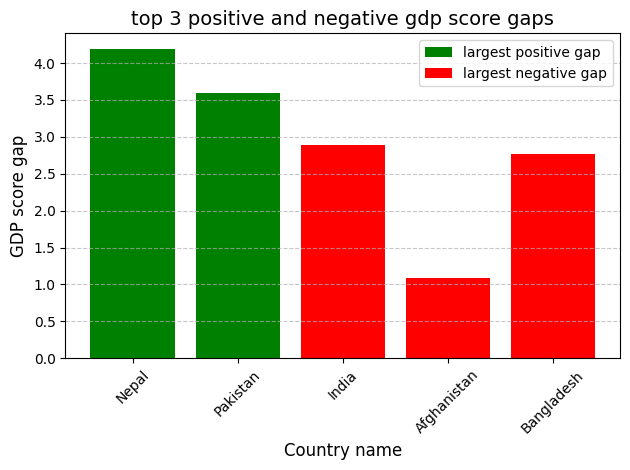

In [ ]:
# Task - 5 - Gap Analysis:
# Tasks:
# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
# for each South Asian country.
# 2. Rank the South Asian countries by this gap in both ascending and descending order.
# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
# 4. Analyze the reasons behind these gaps and their implications for South Asian countries.
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/assignment 1/WHR-2024-5CS037.csv")

data['GDP score Gap'] =data['score']-data['Log GDP per capita']
print(data[['Country name','GDP score Gap']])

ascending_gap = data.sort_values(by='GDP score Gap', ascending=True)
descending_gap = data.sort_values(by='GDP score Gap', ascending=False)

top_3_positive_gap = ascending_gap.nlargest(3,'GDP score Gap')
top_3_negative_gap = ascending_gap.nsmallest(3,'GDP score Gap')

plt.bar(top_3_positive_gap['Country name'],top_3_positive_gap['GDP score Gap'],color='green',label='largest positive gap')
plt.bar(top_3_negative_gap['Country name'],top_3_negative_gap['GDP score Gap'],color='red',label='largest negative gap')

plt.xlabel('Country name', fontsize=12)
plt.ylabel('GDP score gap',fontsize=12)
plt.title(f'top 3 positive and negative gdp score gaps',fontsize=14)
plt.legend()
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 1. Descriptive Statistics:
# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
# • Which region has higher happiness Scores on average?
data = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037 (1).csv")

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"]

middle_east = data[data['Country name'].isin( middle_east_countries)]
middle_mean = middle_east['score'].mean()
middle_std = middle_east['score'].std()

print("mean of middle east: ",middle_mean)
print("std of middle east: ",middle_std)


south_asian = data[data['Country name'].isin(south_asian_countries)]
south_mean = south_asian['score'].mean()
south_std = south_asian['score'].std()
print("mean of south asia: ",south_mean)
print("std of south east: ",south_std)


if middle_mean > south_mean:
  print("middle east average happiness score is higher")
else:
  print("south asain average happiness score is higher")



mean of middle east:  5.412100000000001
std of middle east:  1.5662011684327144
mean of south asia:  3.895666666666667
std of south east:  1.1770690152521504
middle east average happiness score is higher


Text(0.5, 0, 'Country')

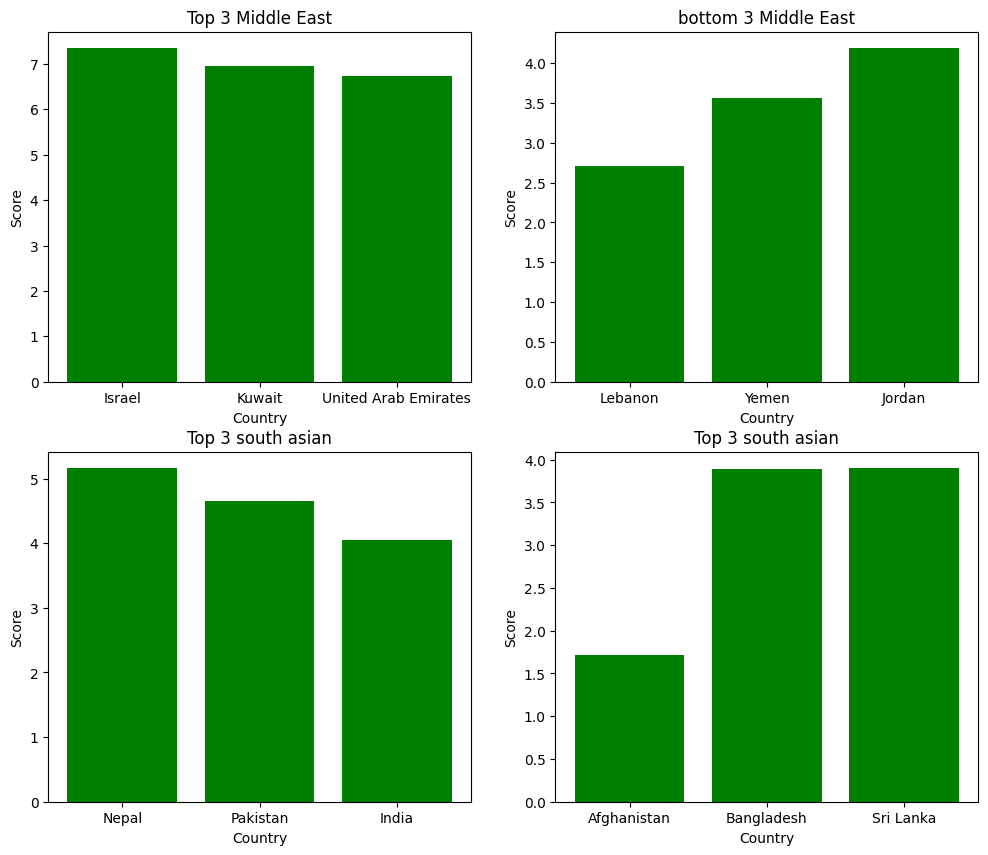

In [ ]:
# 2. Top and Bottom Performers:
# • Identify the top 3 and bottom 3 countries in each region based on the score.
# • Plot bar charts comparing these charts.
data = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037 (1).csv")

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"]

middle_east = data[data['Country name'].isin( middle_east_countries)]
south_asian = data[data['Country name'].isin(south_asian_countries)]


middle_east_sorted = middle_east.sort_values(by='score', ascending=False)
south_asian_sorted = south_asian.sort_values(by='score', ascending=False)

middle_east_top3 = middle_east_sorted.nlargest(3,'score')
middle_east_bottom3 = middle_east_sorted.nsmallest(3,'score')

south_asian_top3 = south_asian_sorted.nlargest(3,'score')
south_asian_bottom3 = south_asian_sorted.nsmallest(3,'score')

fig, axes = plt.subplots(2,2, figsize = (12,10))

axes[0, 0].bar(middle_east_top3["Country name"], middle_east_top3["score"], color="green")
axes[0, 0].set_title("Top 3 Middle East")
axes[0, 0].set_ylabel("Score")
axes[0, 0].set_xlabel("Country")

axes[0, 1].bar(middle_east_bottom3["Country name"], middle_east_bottom3["score"], color="green")
axes[0, 1].set_title("bottom 3 Middle East")
axes[0, 1].set_ylabel("Score")
axes[0, 1].set_xlabel("Country")

axes[1, 0].bar(south_asian_top3["Country name"], south_asian_top3["score"], color="green")
axes[1, 0].set_title("Top 3 south asian")
axes[1, 0].set_ylabel("Score")
axes[1, 0].set_xlabel("Country")

axes[1, 1].bar(south_asian_bottom3["Country name"], south_asian_bottom3["score"], color="green")
axes[1, 1].set_title("Top 3 south asian")
axes[1, 1].set_ylabel("Score")
axes[1, 1].set_xlabel("Country")

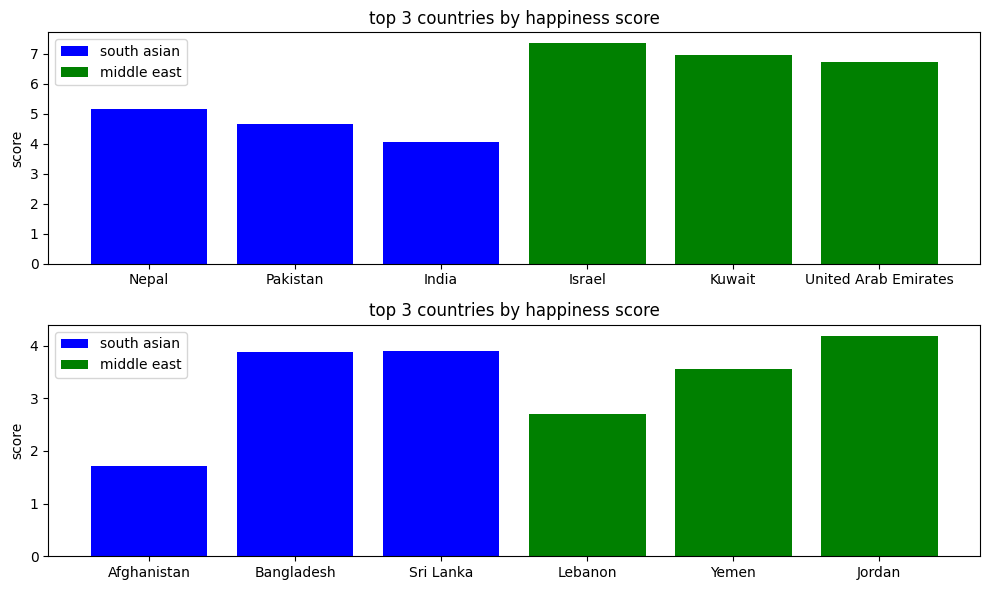

In [ ]:
# 3. Metric Comparisons:
# • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
# between the regions using grouped bar charts.
# • Which metrics show the largest disparity between the two regions?

data = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037 (1).csv")


middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"]

middle_east = data[data['Country name'].isin( middle_east_countries)]
south_asian = data[data['Country name'].isin(south_asian_countries)]


middle_east_sorted = middle_east.sort_values(by='score', ascending=False)
south_asian_sorted = south_asian.sort_values(by='score', ascending=False)

middle_east_top3 = middle_east_sorted.nlargest(3,'score')
middle_east_bottom3 = middle_east_sorted.nsmallest(3,'score')

south_asian_top3 = south_asian_sorted.nlargest(3,'score')
south_asian_bottom3 = south_asian_sorted.nsmallest(3,'score')

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.bar(south_asian_top3['Country name'],south_asian_top3['score'],color='blue',label='south asian')
plt.bar(middle_east_top3['Country name'],middle_east_top3['score'],color='green',label='middle east')
plt.title('top 3 countries by happiness score')
plt.ylabel('score')
plt.legend()

plt.subplot(2,1,2)
plt.bar(south_asian_bottom3['Country name'],south_asian_bottom3['score'],color='blue',label='south asian')
plt.bar(middle_east_bottom3['Country name'],middle_east_bottom3['score'],color='green',label='middle east')
plt.title('top 3 countries by happiness score')
plt.ylabel('score')
plt.legend()

plt.tight_layout()
plt.show()


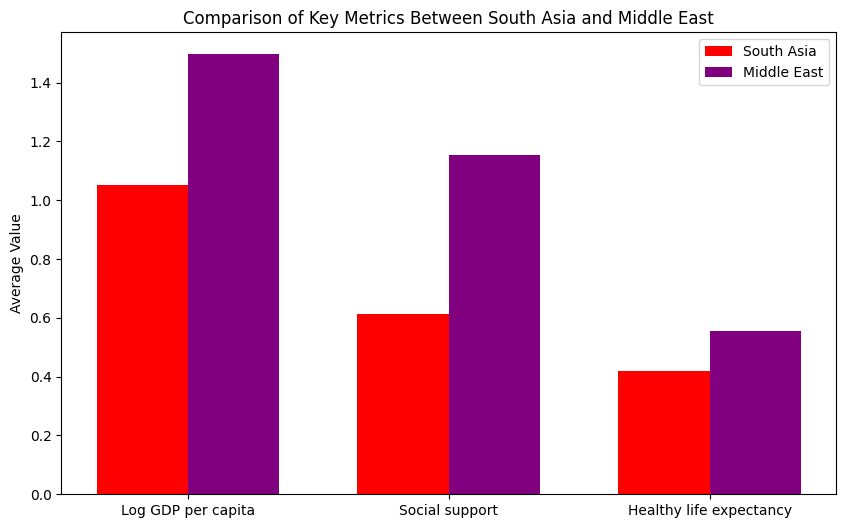


Metrics Comparison Analysis:
                    Metric  South Asia  Middle East  Difference
0       Log GDP per capita    1.051833     1.496333    0.444500
1           Social support    0.611833     1.152778    0.540944
2  Healthy life expectancy    0.420333     0.554111    0.133778

Metric with the Largest Disparity:
Social support


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037 (1).csv")

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal",
    "Pakistan", "Sri Lanka"
]

key_metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

middle_east = data[data['Country name'].isin(middle_east_countries)]
south_asian = data[data['Country name'].isin(south_asian_countries)]

mean_south_asia = south_asian[key_metrics].mean()
mean_middle_east = middle_east[key_metrics].mean()

metrics_comparison = pd.DataFrame({
    "Metric": key_metrics,
    "South Asia": mean_south_asia.values,
    "Middle East": mean_middle_east.values,
})

x = np.arange(len(metrics_comparison))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, metrics_comparison["South Asia"], width, label='South Asia', color='red')
plt.bar(x + width/2, metrics_comparison["Middle East"], width, label='Middle East', color='purple')

plt.xticks(x, metrics_comparison["Metric"])
plt.ylabel("Average Value")
plt.title("Comparison of Key Metrics Between South Asia and Middle East")
plt.legend()
plt.show()

metrics_comparison["Difference"] = abs(metrics_comparison["South Asia"] - metrics_comparison["Middle East"])

max_disparity_metric = metrics_comparison.loc[metrics_comparison["Difference"].idxmax(), "Metric"]

print("\nMetrics Comparison Analysis:")
print(metrics_comparison)
print("\nMetric with the Largest Disparity:")
print(max_disparity_metric)


In [ ]:
# 4. Happiness Disparity:
# • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
# • Which region has greater variability in happiness?

data = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037 (1).csv")

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal",
    "Pakistan", "Sri Lanka"
]

middle_east = data[data['Country name'].isin(middle_east_countries)]
south_asian = data[data['Country name'].isin(south_asian_countries)]

south_asia_range = south_asian['score'].max() - south_asian['score'].min()
middle_east_range = middle_east['score'].max() - middle_east['score'].min()

south_asia_cv = south_asian['score'].std() / south_asian['score'].mean()
middle_east_cv = middle_east['score'].std() / middle_east['score'].mean()

print("happiness score variability Analysis")
print(f'south Asia - Range : {south_asia_range}, coefficient of variation : {south_asia_cv}')
print(f'middle east - Range : {middle_east_range}, coefficient of variation : {middle_east_cv}')

if south_asia_cv > middle_east_cv:
  print("south asia has greater variability")
else:
  print("middle east has greater variability")

happiness score variability Analysis
south Asia - Range : 3.4370000000000003, coefficient of variation : 0.3021482883337427
middle east - Range : 4.634, coefficient of variation : 0.28938880812119405
south asia has greater variability


south asia correlation
freedom to make life choices : 0.8005185224163315
generosity : 0.874512371253192
middle east correlation
freedom to make life choices : 0.8632202433827544


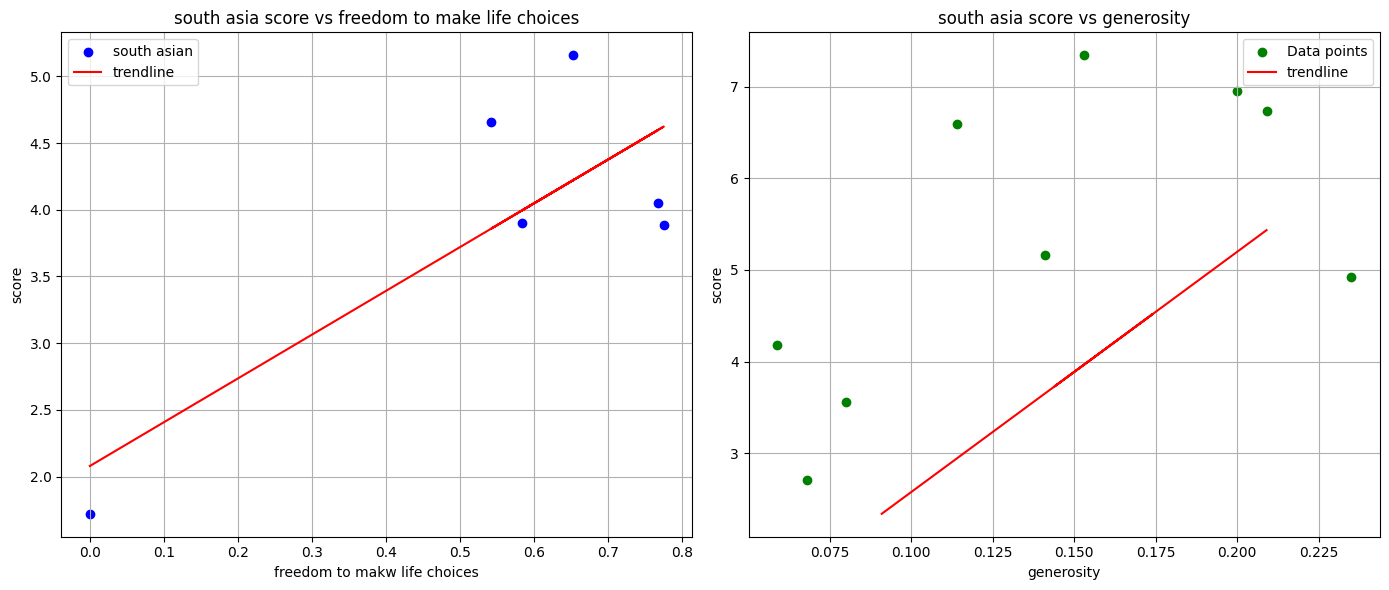

In [ ]:
# 5. Correlation Analysis:
# • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
# Generosity within each region.
# • Create scatter plots to visualize and interpret the relationships.
data = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037 (1).csv")


middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal",
    "Pakistan", "Sri Lanka"
]

middle_east = data[data['Country name'].isin(middle_east_countries)]
south_asian = data[data['Country name'].isin(south_asian_countries)]

freedom_corr_of_sa = south_asian['score'].corr(south_asian['Freedom to make life choices'])
generosity_corr_of_sa = south_asian['score'].corr(south_asian['Generosity'])

freedom_corr_of_me = middle_east['score'].corr(middle_east['Freedom to make life choices'])
generosity_corr_of_me = middle_east['score'].corr(middle_east['Generosity'])

print("south asia correlation")
print(f'freedom to make life choices : {freedom_corr_of_sa}')
print(f'generosity : {generosity_corr_of_sa}')

print("middle east correlation")
print(f'freedom to make life choices : {freedom_corr_of_me}')

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(south_asian['Freedom to make life choices'],south_asian['score'],color='blue',label='south asian')
z1=np.polyfit(south_asian['Freedom to make life choices'],south_asian['score'],1)
p1=np.poly1d(z1)
plt.plot(south_asian['Freedom to make life choices'],p1(south_asian['Freedom to make life choices']),color='red',label='trendline')
plt.title('south asia score vs freedom to make life choices')
plt.xlabel('freedom to makw life choices')
plt.ylabel('score')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(middle_east['Generosity'],middle_east['score'],color='green',label='Data points')
z2=np.polyfit(south_asian['Generosity'],south_asian['score'],1)
p2=np.poly1d(z2)
plt.plot(south_asian['Generosity'],p2(south_asian['Generosity']),color='red',label='trendline')
plt.title('south asia score vs generosity')
plt.xlabel('generosity')
plt.ylabel('score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

south asia scroe outliers :
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual  
142                      0.088                0.672  
south asia gdp outliers :
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual  
142                      0.088                0.672  
middle east scroe outliers :
Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity,

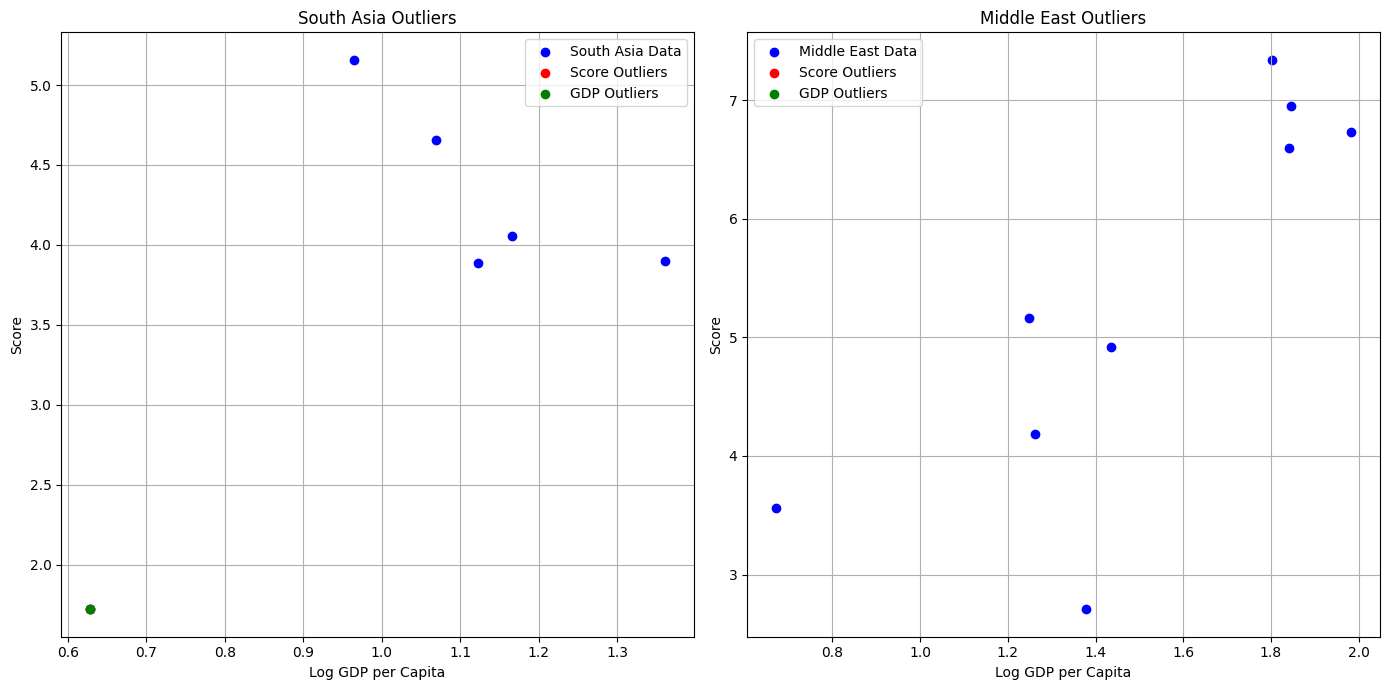

South Asia Outliers:
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual  
142                      0.088                0.672  
142                      0.088                0.672  

Middle East Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual]
Index: []


In [ ]:
# 6. Outlier Detection:
# • Identify outlier countries in both regions based on Score and GDP per Capita.
# • Plot these outliers and discuss their implications.

def outlier_detection(data,column):
  Q1 = np.percentile(data[column],25)
  Q3 = np.percentile(data[column],75)
  IQR = Q3- Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5*IQR
  return data[(data[column]<lower_bound) | (data[column]>upper_bound)]

print("south asia scroe outliers :")
sa_score_outliers = outlier_detection(south_asian,'score')
print(sa_score_outliers)

print("south asia gdp outliers :")
sa_gdp_outliers = outlier_detection(south_asian,'Log GDP per capita')
print(sa_gdp_outliers)

print("middle east scroe outliers :")
me_score_outliers = outlier_detection(middle_east,'score')
print(me_score_outliers)
print("middle east gdp outliers :")
me_gdp_outliers = outlier_detection(middle_east,'Log GDP per capita')
print(me_gdp_outliers)

south_asia_combined_outliers = pd.concat([sa_score_outliers,sa_gdp_outliers])
middle_east_combined_outliers = pd.concat([me_score_outliers,me_gdp_outliers])

plt.figure(figsize=(14, 7))

# South Asia outliers
plt.subplot(1, 2, 1)
plt.scatter(south_asian['Log GDP per capita'], south_asian['score'], color='blue', label='South Asia Data')
plt.scatter(sa_score_outliers['Log GDP per capita'], sa_score_outliers['score'], color='red', label='Score Outliers')
plt.scatter(sa_gdp_outliers['Log GDP per capita'], sa_gdp_outliers['score'], color='green', label='GDP Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('South Asia Outliers')
plt.legend()
plt.grid(True)

# Middle East outliers
plt.subplot(1, 2, 2)
plt.scatter(middle_east['Log GDP per capita'], middle_east['score'], color='blue', label='Middle East Data')
plt.scatter(me_score_outliers['Log GDP per capita'], me_score_outliers['score'], color='red', label='Score Outliers')
plt.scatter(me_gdp_outliers['Log GDP per capita'], me_gdp_outliers['score'], color='green', label='GDP Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Middle East Outliers')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Discussion
print("South Asia Outliers:")
print(south_asia_combined_outliers)
print("\nMiddle East Outliers:")
print(middle_east_combined_outliers)

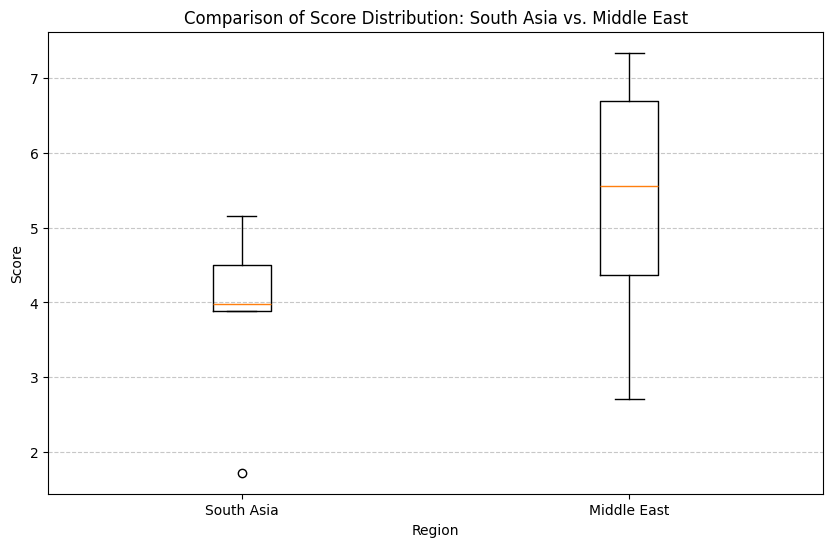

South Asia Score Summary:
count    6.000000
mean     3.895667
std      1.177069
min      1.721000
25%      3.889000
50%      3.976000
75%      4.506250
max      5.158000
Name: score, dtype: float64

Middle East Score Summary:
count    10.000000
mean      5.412100
std       1.566201
min       2.707000
25%       4.370250
50%       5.562500
75%       6.698250
max       7.341000
Name: score, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037 (1).csv")

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal",
    "Pakistan", "Sri Lanka"
]

middle_east = data[data['Country name'].isin(middle_east_countries)]
south_asian = data[data['Country name'].isin(south_asian_countries)]

middle_east_scores = middle_east['score']
south_asian_scores = south_asian['score']

plt.figure(figsize=(10, 6))
plt.boxplot([south_asian_scores, middle_east_scores], labels=["South Asia", "Middle East"])
plt.title("Comparison of Score Distribution: South Asia vs. Middle East")
plt.xlabel("Region")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("South Asia Score Summary:")
print(south_asian['score'].describe())

print("\nMiddle East Score Summary:")
print(middle_east['score'].describe())
